# Checkpoints Part 1

## Spark funds -  Asset Management Company

<b> Objective </b> - CEO of our company wants to invest money in few companies. Her investments will be guided by global trend in the investments (on where do most of the investors are investing)

<b> Constraints </b>-

<ul>
    <li> Wants to do investment in the range of 5 to 15 USM million dollars </li>
    <li> Wants to do investment in only English speaking countries </li>
</ul>

<b> Buisness Objective </b>-

To invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.

<b> Data analusis Objectives </b> -

<ul>
    <li> To understand which Investment types are attracting the most of the investments. </li>
    <li> To understand which are the countries attracting most of the investments.  </li>
    <li> To understand which are the Main sectors (8 main) attracting most of the investments.  </li>
</ul>


# Checkpoint 1: Data Cleaning 1

In [88]:
# import all libraries for this stage
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests 
from bs4 import BeautifulSoup as soup

In [89]:
companies = pd.read_csv(r"C:\Users\abc\Downloads\AI-ML\git\assignments\First Assignment\csv\companies.csv", encoding='palmos')
rounds2 = pd.read_csv(r"C:\Users\abc\Downloads\AI-ML\git\assignments\First Assignment\csv\rounds2.csv", encoding='palmos')
mapping = pd.read_csv(r"C:\Users\abc\Downloads\AI-ML\git\assignments\First Assignment\csv\mapping.csv")

In [90]:
# analyse companies
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [91]:
# analyse rounds2
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


# Initial Analysis

In [92]:
#converting values to lower case for permalink as letters have different usecases
rounds2.company_permalink = rounds2.company_permalink.apply(lambda x : str.lower(x))
companies.permalink = companies.permalink.apply(lambda x : str.lower(x))

## No of unique companies in companies

In [93]:
companies.permalink.nunique()

66368

## No of unique companies in rounds2

In [94]:
rounds2.company_permalink.nunique()

66368

### Let's see which colums are contenstant for to be unique, broadly there are two <font color ='red'> name </font>  and <font color ='red'> permalink</font> 
Now let's see whether this columns contain any duplicate data or not

In [95]:
companies[companies.permalink.duplicated()]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


In [96]:
companies.name[companies.name.duplicated()]

282         3DIVAZ
1527        Adtena
1996         Agora
3006        Amicus
3091     Amplitude
           ...    
64571       Wunder
64572       Wunder
65799        Gusto
65899        Zesty
66029      ZingBox
Name: name, Length: 268, dtype: object

In [97]:
companies[companies.name.duplicated()].head(5)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
282,/organization/3divaz-3,3DIVAZ,http://www.3divaz.ch/Home,NaN,operating,CHE,1,CHE - Other,Wildegg,01-07-2014
1527,/organization/adtena-2,Adtena,http://adtena.com,NaN,closed,NaN,NaN,NaN,NaN,15-11-2014
1996,/organization/agora-6,Agora,https://www.agora.co,Android|Apps|Internet|Mobile,operating,USA,NY,New York City,New York,01-07-2013
3006,/organization/amicus-co,Amicus,http://www.amicus.co,Apps|Mobile|Mobile Commerce,operating,IND,7,New Delhi,New Delhi,01-01-2015
3091,/organization/amplitude-2,Amplitude,http://amplitude-technologies.com/,Electronics,operating,FRA,A8,Ãƒâ€°vry,Ã‰vry,01-01-2001


As we can see from above data that <font color ='red'> name </font> column has duplicate data whereas <font color ='red'> permalink </font> has no duplicate data. And where name is duplicated there we have different permalink. So it's clear we that we have to take <b> permalink as our unique column. </b>

<b> Let's whether there are any companies in the rounds2 file which are not  present in companies

In [98]:
list(set(rounds2.company_permalink)-set(companies.permalink))

[]

So there are no companies which are not present in companies file

# Merging the two dataframes

Before this let's rename company_permalink to permalink for better understanding

In [99]:
rounds2 = rounds2.rename(columns={'company_permalink':'permalink'})

### Merging two dataframes, using inner join as we common data only

In [100]:
master_frame = pd.merge(left=rounds2,right=companies,how='inner',left_on='permalink',right_on='permalink')
master_frame.count()

permalink                  114949
funding_round_permalink    114949
funding_round_type         114949
funding_round_code          31140
funded_at                  114949
raised_amount_usd           94959
name                       114948
homepage_url               108815
category_list              111539
status                     114949
country_code               106271
state_code                 104003
region                     104782
city                       104785
founded_at                  94428
dtype: int64

# Data cleaning

Let's try to find out which column has null or blank values.
Let's plot heat map of null values in each column

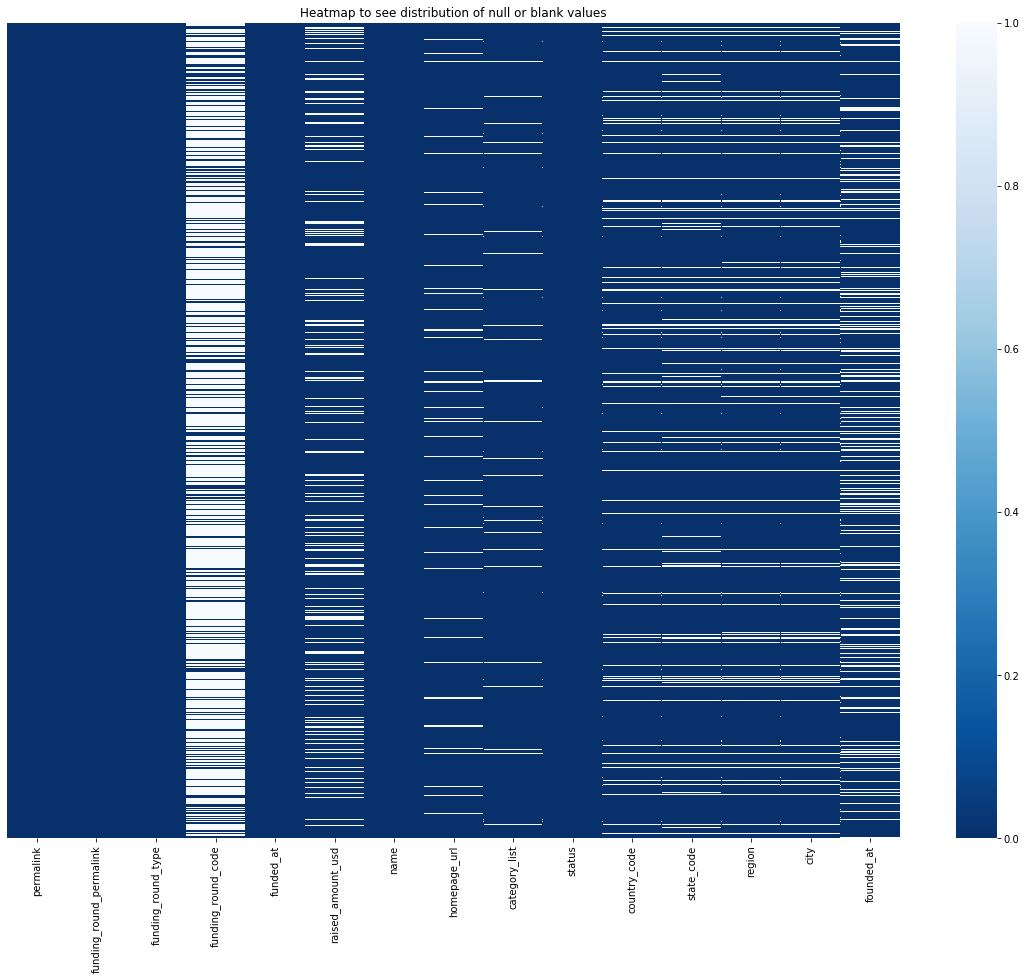

In [101]:
plt.figure(figsize=(20,15))
sns.heatmap(master_frame.isna(),cbar=True, yticklabels=False, cmap="Blues_r" )
plt.title("Heatmap to see distribution of null or blank values")
plt.show()

We can see from above heatmap that funding_round_code and founded_at fields have most of the null or blank values.
Now let's try to figure out which are the columns which are necessary for our analysis so that we can get rid of other columns.

<ul>
    <li>permalink - It's necessary as it contains unique id</li>
    <li>funding_round_permalink - Not necessary</li>
    <li>funding_round_type - Necessary</li>
    <li>funding_round_code - Not necessary</li>
    <li>funded_at - Not necessary</li>
    <li>raised_amount_usd - Necessary</li>
    <li>name - Necessary</li>
    <li>homepage_url - Not necessary</li>
    <li>category_list - Necessary</li>
    <li>status - not necessary</li>
    <li>country_code - necessary</li>
    <li>state_code - Not necessary</li>
    <li>region - Not necessary</li>
    <li>city - Not necessary</li>
    <li>founded_at -Not necessary</li>
</ul>

In [102]:
master_frame = master_frame[['permalink', 'funding_round_type', 'raised_amount_usd', 'name','category_list', 'country_code']]

Let's see now how many null values are present

### Only selecting those fund types in which company is interested (We can do this as funding_round_type has no blank or null values)

Before selecting let's see value counts to see whether naming is uniform or not

In [103]:
master_frame.funding_round_type.value_counts() #no issues

venture                  55494
seed                     30524
debt_financing            6895
angel                     6094
undisclosed               4897
equity_crowdfunding       3257
private_equity            2285
grant                     2200
convertible_note          1817
post_ipo_equity            638
product_crowdfunding       410
non_equity_assistance      191
post_ipo_debt              152
secondary_market            95
Name: funding_round_type, dtype: int64

In [104]:
master_frame = master_frame[master_frame.funding_round_type.isin(['venture','seed','private_equity','angel'])]

In [105]:
master_frame.isnull().sum()

permalink                 0
funding_round_type        0
raised_amount_usd     13770
name                      1
category_list          2497
country_code           7321
dtype: int64

As we have to find top performing countries we can't ignore data where country is not preset besides we could have founded the name of the country by fetching details on city but as even that information is not present we're simply dropping all the rows.

In [142]:
master_frame = master_frame[~master_frame.country_code.isnull()]

In [143]:
master_frame.isnull().sum()

permalink                 0
funding_round_type        0
raised_amount_usd     11470
name                      1
category_list          1142
country_code              0
dtype: int64

Now as we can see there are 11470 rows which don't have raised_amount_usd values.
I can't directly drop this values as my analysis depends on number of investments in each country.

Let's see distribution of the null values across countries

In [144]:
temp = master_frame[master_frame.raised_amount_usd.isnull()].groupby('country_code')['country_code'].count().sort_values(ascending=False)

<function matplotlib.pyplot.show(*args, **kw)>

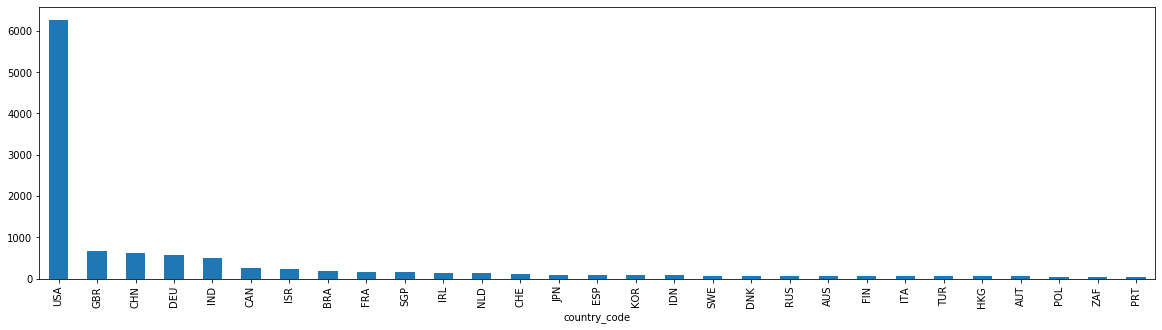

In [145]:
temp[temp > 30].plot.bar(figsize=(20,5))
plt.show

Clearly from above table we can see that if I remove all values which doens't have raised_amount_usd then USA will have 
disadvantage. As our analysis depends on number of investments in each country we have to consider imputing values null raised_amount_usd value.

Before theat we have to figure out mean values for each country but before that let's remove outliners. We will look for outliers on funding type basis.

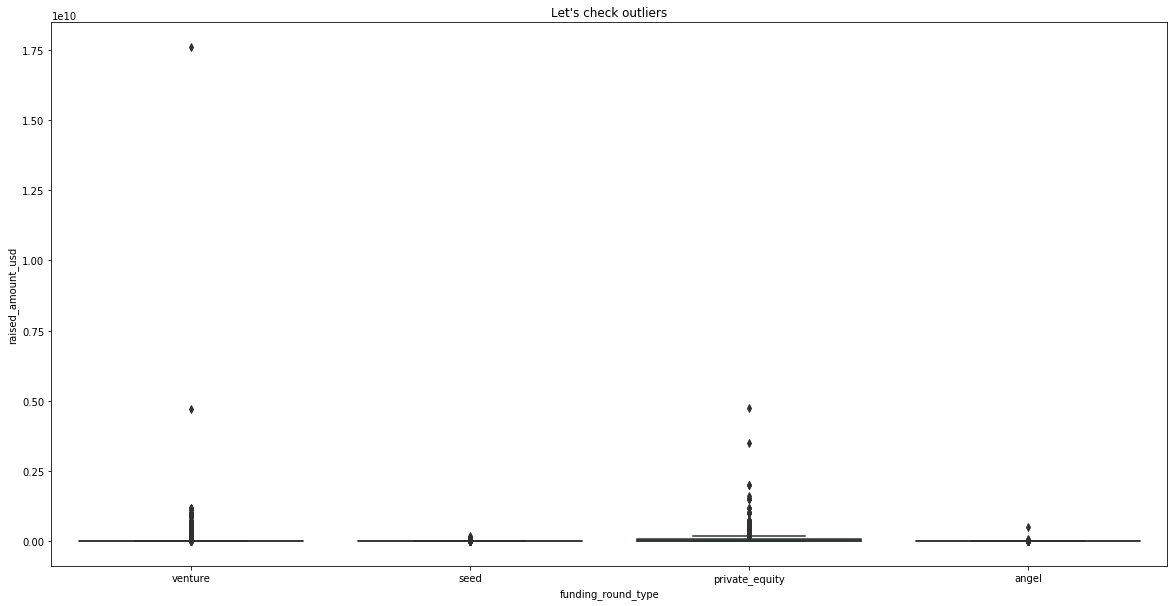

In [147]:
plt.figure(figsize=(20,10))
plt.title("Let's check outliers")
sns.boxplot(data=master_frame,x='funding_round_type',y='raised_amount_usd', palette='colorblind')
plt.show()

In [148]:
master_frame[(master_frame.raised_amount_usd > 15000000000)]

,permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
37569,/organization/freescale,venture,1.760000e+10,Freescale Semiconductor,Semiconductors,USA


In [ ]:
#Let's remove outlier from venture funding type
master_frame = master_frame[~(master_frame.raised_amount_usd > 15000000000)]

In [149]:
master_frame.groupby('country_code')['raised_amount_usd'].sum()

country_code
ALB    2.767440e+05
ARE    7.084432e+08
ARG    3.443836e+08
ARM    2.681750e+07
AUS    2.170403e+09
           ...     
VEN    1.252930e+06
VNM    3.011805e+08
ZAF    6.404621e+08
ZMB    5.200000e+05
ZWE    3.000000e+04
Name: raised_amount_usd, Length: 134, dtype: float64

<b> As our analysis it depends on amount of money raised we can't allow those rows which have null or blank values for raised_amount_usd </b>

In [86]:
master_frame = master_frame[~master_frame.raised_amount_usd.isnull()]

In [87]:
master_frame.isnull().sum()

permalink                0
funding_round_type       0
raised_amount_usd        0
name                     1
category_list          855
country_code          5021
dtype: int64

In [689]:
master_frame[master_frame.name.isnull()] #let's give a name to this company

,permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,founded_at
98688,/organization/tell-it-in,seed,01-03-2012,25000.0,NaN,Startups,closed,USA,01-10-2011


In [690]:
master_frame.loc[master_frame[master_frame.name.isnull()].index.item(),'name'] = master_frame[master_frame.name.isnull()].permalink.item().split("/")[2]

In [691]:
master_frame.isnull().sum()

permalink                 0
funding_round_type        0
funded_at                 0
raised_amount_usd         0
name                      0
category_list           482
status                    0
country_code              0
founded_at            11496
dtype: int64

Now there are two columns which have null values let's keep blank values for category_list for analysis as we can see others column is present in mapping file for blank values and let's ignore founded_at column for now

Let's check for outliers

In [695]:
master_frame.reset_index(inplace=True)

# Checkpoint 2: Funding Type Analysis

### Finding mean for each type of funding type

In [696]:
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values()

funding_round_type
seed              7.481045e+05
angel             9.685599e+05
venture           1.137020e+07
private_equity    7.361856e+07
Name: raised_amount_usd, dtype: float64

### As company wants to do investment in the range of 5M to 15M only venture is satisfying the condition

In [697]:
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().between(5000000,15000000, inclusive=True)

funding_round_type
angel             False
private_equity    False
seed              False
venture            True
Name: raised_amount_usd, dtype: bool

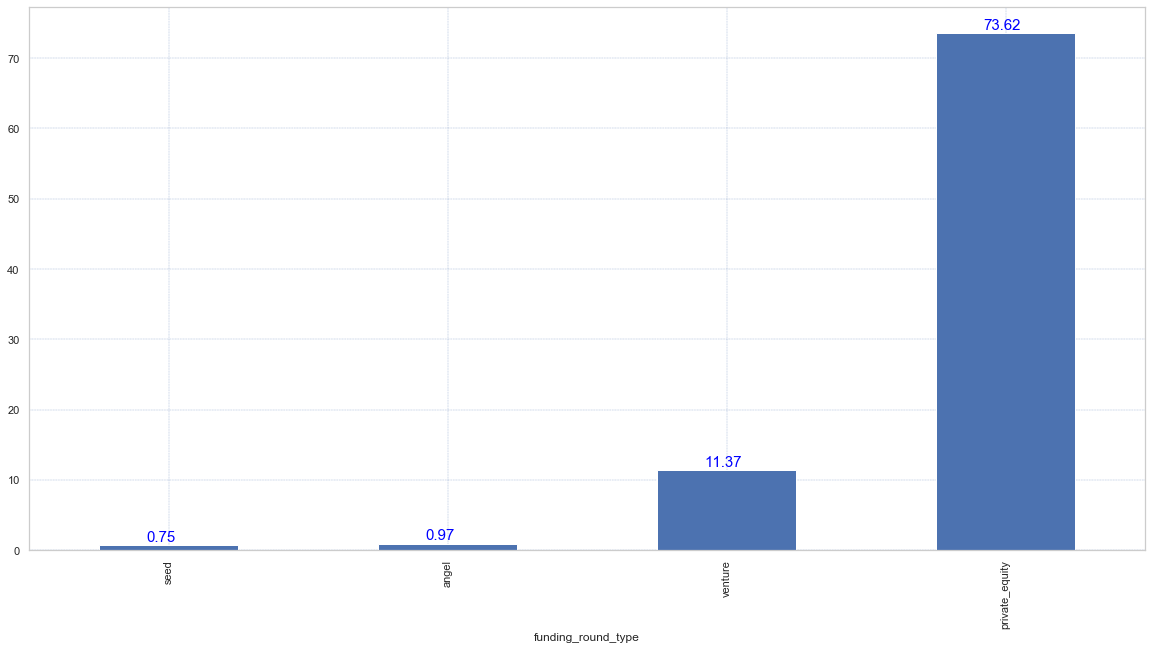

In [698]:
plt.figure(figsize=(20,10))
master_frame["funding_amount_in_milion"] = master_frame.raised_amount_usd.apply(lambda x : x/1000000)
ax = master_frame.groupby('funding_round_type')['funding_amount_in_milion'].mean().sort_values().plot.bar()
ax.grid(color='b', ls = '-.', lw = 0.25)
for i in ax.patches:
    ax.text(i.get_x() + (i.get_width()/2-0.08) , i.get_height()+0.5, str(round((i.get_height()), 2)), fontsize=15, color='blue')

### So selecting only those rows which has funding type as venture

In [699]:
master_frame = master_frame[master_frame.funding_round_type == 'venture']

# Checkpoints part - 2

Let's get the details of the countries which have english as there official language of communication

<b> Now we have to see which countries are English speaking countries for this we will use web scrapping technique to get data 
from wikipedia. </b>

In [700]:
from bs4 import BeautifulSoup 
def en_con_details():
    r = requests.get("https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language") 
    soup = BeautifulSoup(r.text, 'lxml') # Parse the HTML as a string
    table = soup.find_all('table')
    
    headers = []
    tb = 0
    global  off_en_counts
    r = 1
    r_len = len(table[0].find_all('tr')) + len(table[1].find_all('tr'))
    while tb < 2:
        t = table[tb]
        tr_elements = t.find_all('tr')
        for i in range(0,len(tr_elements)):
            
            if i == 0 :
                r -= 1
                if tb == 0:
                    for j in tr_elements[i].find_all('th'):
                        headers.append(str.strip(j.text))
                    off_en_counts = pd.DataFrame([],columns=headers,index=range(0,r_len-2))
            elif i != 0:
                l = 0
                for k in tr_elements[i].find_all('td'):
                    off_en_counts.iloc[r-1,l] = str.strip(k.text)
                    l+=1
            r+=1
        tb+=1
    return off_en_counts

In [701]:
off_en_counts = en_con_details()  

Let's do data cleaning and remove unwanted columns

In [702]:
off_en_counts.drop(['Nr','Region','Population','Primary language?'], axis=1,inplace=True)
off_en_counts['Country'] = off_en_counts['Country'].apply(lambda x : x.split("[")[0])

Now let's merge the <b>off_en_counts </b> and <b> master_frame </b>

In [703]:
off_en_counts = off_en_counts.rename(columns={'Alpha-3 code':'country_code'})

## Checkpoint 3: Country Analysis

In [704]:
master_frame = pd.merge(left=master_frame,right=off_en_counts,how='inner',left_on='country_code',right_on='country_code')

In [705]:
master_frame.reset_index(drop=True,inplace=True)

In [706]:
del master_frame['index']

In [707]:
top9 = master_frame[master_frame.country_code.isin(master_frame.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)[0:9].index)]

In [708]:
top9.head(5)

,permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,founded_at,funding_amount_in_milion,Country
0,/organization/-fame,venture,05-01-2015,10000000.0,#fame,Media,operating,IND,NaN,10.000000,India
1,/organization/21diamonds-india,venture,15-11-2012,6369507.0,21Diamonds,E-Commerce,operating,IND,01-06-2012,6.369507,India
2,/organization/247-learning-private,venture,06-11-2007,4000000.0,24x7 Learning,EdTech|Education|Systems,operating,IND,01-01-2001,4.000000,India
3,/organization/3dsoc,venture,01-12-2007,1240000.0,3DSoC,3D|Mobile,operating,IND,01-06-2006,1.240000,India
4,/organization/3dsoc,venture,01-08-2010,825000.0,3DSoC,3D|Mobile,operating,IND,01-06-2006,0.825000,India


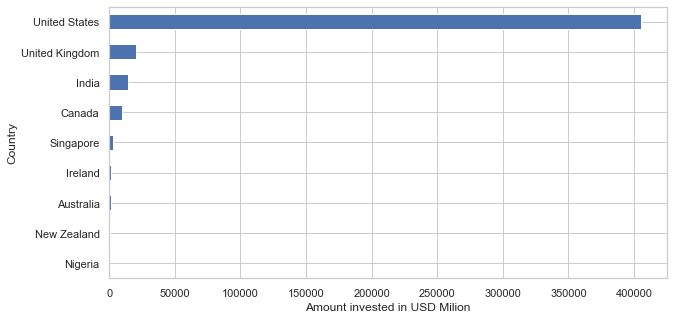

In [709]:
plt.figure(figsize=(10,5))
top9.groupby('Country')['funding_amount_in_milion'].sum().sort_values().plot.barh()
plt.xlabel("Amount invested in USD Milion" )
plt.show()

### Top 3 English speaking performing countries

In [710]:
top9.groupby('Country')['raised_amount_usd'].sum().sort_values(ascending=False)[0:3]

Country
United States     4.049108e+11
United Kingdom    2.024563e+10
India             1.439186e+10
Name: raised_amount_usd, dtype: float64

# Checkpoint 4: Sector Analysis 1

## Now let's merge master_dataframe with mapping sheet (which contains mapping of categories with main sector)

In [711]:
mapping['main_sector'] = mapping.loc[:,mapping.columns[1]:].dot(mapping.columns[1:])

In [712]:
mapping = mapping[['category_list','main_sector']]

<b>Let's merge the mapping file and master_frame</b>

Before that we have to process those categories which have multiple secotors.

In [713]:
top9.category_list = top9.category_list.apply(lambda x: str(x).split("|")[0])

F:\Amar-AIML\Softwares\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [714]:
top9 = pd.merge(left=top9,right=mapping,how='inner',left_on='category_list',right_on='category_list')
top9.tail(5)

,permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,founded_at,funding_amount_in_milion,Country,main_sector
38020,/organization/skin-analytics,venture,09-07-2014,100000.0,Skin Analytics,mHealth,operating,GBR,01-05-2012,0.1000,United Kingdom,Health
38021,/organization/vector-watch,venture,25-11-2015,5000000.0,Vector Watch,Watch,operating,GBR,01-01-2013,5.0000,United Kingdom,Others
38022,/organization/meetingsbooker-com,venture,22-10-2014,1271800.0,Meetingsbooker.com,Business Travelers,operating,IRL,01-01-2009,1.2718,Ireland,Entertainment
38023,/organization/simmesion-holdings,venture,31-03-2008,1900000.0,Simmersion Holdings,Simulation,operating,AUS,01-01-2002,1.9000,Australia,Others
38024,/organization/simmesion-holdings,venture,06-06-2006,742000.0,Simmersion Holdings,Simulation,operating,AUS,01-01-2002,0.7420,Australia,Others


# Checkpoint 5: Sector Analysis 2
## Creating seperate dataframe for each country

In [715]:
D1 = top9[top9.country_code == 'USA']

In [716]:
D2 =  top9[top9.country_code == 'GBR']

In [717]:
D3 =  top9[top9.country_code == 'IND']

<b> Let's find out total number of investments for each country

In [718]:
top9.groupby('country_code')['country_code'].count().sort_values(ascending=False)

country_code
USA    33525
GBR     1916
CAN     1176
IND      745
SGP      206
IRL      204
AUS      194
NZL       47
NGA       12
Name: country_code, dtype: int64

<b> Let's find out total amound of investment for each country </b>

In [719]:
top9.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)[0:3]

country_code
USA    3.746376e+11
GBR    1.892439e+10
IND    1.353798e+10
Name: raised_amount_usd, dtype: float64

In [720]:
D1.groupby('main_sector')['main_sector'].count().sort_values(ascending=False)

main_sector
Others                                     8243
Cleantech / Semiconductors                 7848
Social, Finance, Analytics, Advertising    5156
News, Search and Messaging                 4301
Health                                     3263
Manufacturing                              2453
Entertainment                              1756
Automotive & Sports                         505
Name: main_sector, dtype: int64

In [721]:
D2.groupby('main_sector')['main_sector'].count().sort_values(ascending=False)

main_sector
Others                                     507
Cleantech / Semiconductors                 433
Social, Finance, Analytics, Advertising    318
News, Search and Messaging                 241
Entertainment                              133
Manufacturing                              122
Health                                     118
Automotive & Sports                         44
Name: main_sector, dtype: int64

In [722]:
D3.groupby('main_sector')['main_sector'].count().sort_values(ascending=False)

main_sector
Others                                     281
News, Search and Messaging                 130
Social, Finance, Analytics, Advertising     77
Entertainment                               75
Manufacturing                               55
Cleantech / Semiconductors                  54
Health                                      42
Automotive & Sports                         31
Name: main_sector, dtype: int64

In [723]:
D1[D1.main_sector == 'Others'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False)[:1]

name
SoFi    1.365200e+09
Name: raised_amount_usd, dtype: float64

In [724]:
D2[D2.main_sector == 'Others'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False)[:1]

name
OneWeb    500000000.0
Name: raised_amount_usd, dtype: float64

In [725]:
D3[D3.main_sector == 'Others'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False)[:1]

name
Flipkart    2.451000e+09
Name: raised_amount_usd, dtype: float64

In [726]:
D1[D1.main_sector == 'Cleantech / Semiconductors'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False)[:1]

name
Juno Therapeutics    1.159803e+09
Name: raised_amount_usd, dtype: float64

In [727]:
D2[D2.main_sector == 'Cleantech / Semiconductors'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False)[:1]

name
Immunocore    320000000.0
Name: raised_amount_usd, dtype: float64

In [728]:
D3[D3.main_sector == 'Cleantech / Semiconductors'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False)[:1]

name
CaptureSolar Energy    125000000.0
Name: raised_amount_usd, dtype: float64

# Checkpoint 6: Plots

In [729]:
top3 = top9[top9.Country.isin(list(top9.groupby('Country')['raised_amount_usd'].sum().sort_values(ascending=False)[0:3].index))]

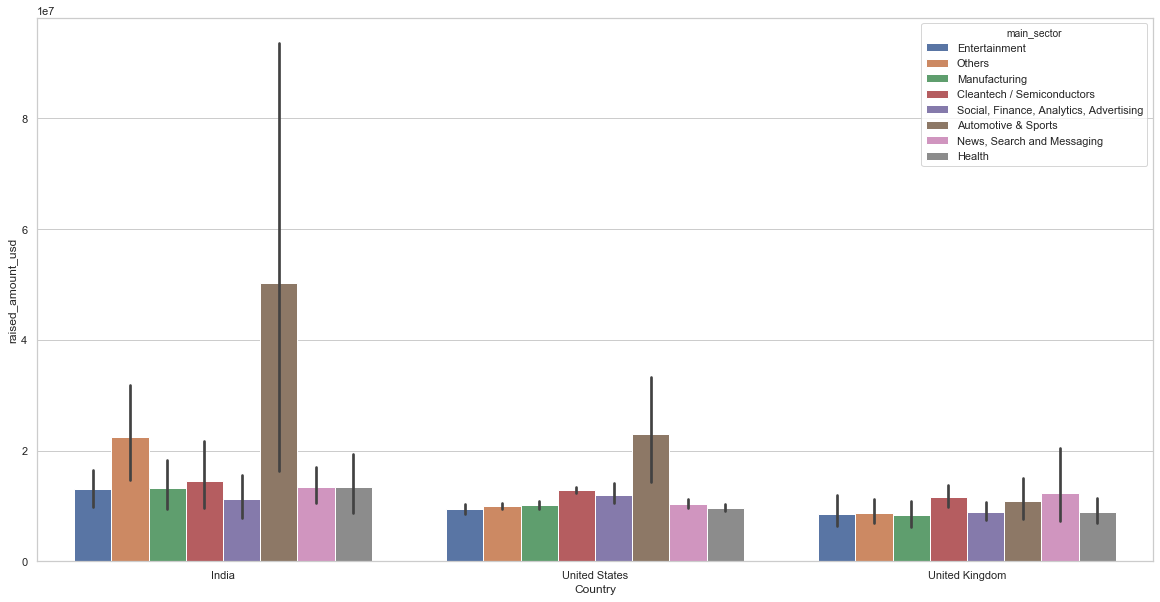

In [730]:
plt.figure(figsize=(20,10))
sns.barplot(x="Country", y="raised_amount_usd", hue="main_sector", data=top3)
plt.show()

In [731]:
top9.groupby('Country')['raised_amount_usd'].sum().sort_values(ascending=False)[0:3].index

Index(['United States', 'United Kingdom', 'India'], dtype='object', name='Country')

# Canada vs India ---- choosing values in multilevel index

In [770]:
report = top3.groupby(['Country','main_sector'])['Country'].agg(['count']).sort_values(by=(['Country','count']),ascending=False)

In [782]:
report.loc[['United States','India']][0:3]

count
Country       main_sector                                   
United States Others                                    8243
              Cleantech / Semiconductors                7848
              Social, Finance, Analytics, Advertising   5156

In [822]:
top3.groupby(['Country','main_sector'])['Country'].agg(['count']).sort_values(by=(['Country','count']),ascending=False)

count
Country        main_sector                                   
United States  Others                                    8243
               Cleantech / Semiconductors                7848
               Social, Finance, Analytics, Advertising   5156
               News, Search and Messaging                4301
               Health                                    3263
               Manufacturing                             2453
               Entertainment                             1756
               Automotive & Sports                        505
United Kingdom Others                                     507
               Cleantech / Semiconductors                 433
               Social, Finance, Analytics, Advertising    318
               News, Search and Messaging                 241
               Entertainment                              133
               Manufacturing                              122
               Health                                     118
               Automotive & Sports                         44
India          Others                                     281
               News, Search and Messaging                 130
               Social, Finance, Analytics, Advertising     77
               Entertainment                               75
               Manufacturing                               55
               Cleantech / Semiconductors                  54
               Health                                      42
               Automotive & Sports                         31

In [823]:
report["group_rank"] = report.rank(method='dense',ascending=False)

In [824]:
report

count  group_rank
Country        main_sector                                               
United States  Others                                    8243         1.0
               Cleantech / Semiconductors                7848         2.0
               Social, Finance, Analytics, Advertising   5156         3.0
               News, Search and Messaging                4301         4.0
               Health                                    3263         5.0
               Manufacturing                             2453         6.0
               Entertainment                             1756         7.0
               Automotive & Sports                        505         9.0
United Kingdom Others                                     507         8.0
               Cleantech / Semiconductors                 433        10.0
               Social, Finance, Analytics, Advertising    318        11.0
               News, Search and Messaging                 241        13.0
               Entertainment                              133        14.0
               Manufacturing                              122        16.0
               Health                                     118        17.0
               Automotive & Sports                         44        22.0
India          Others                                     281        12.0
               News, Search and Messaging                 130        15.0
               Social, Finance, Analytics, Advertising     77        18.0
               Entertainment                               75        19.0
               Manufacturing                               55        20.0
               Cleantech / Semiconductors                  54        21.0
               Health                                      42        23.0
               Automotive & Sports                         31        24.0

In [839]:
top9.groupby(['Country','main_sector'])['raised_amount_usd'].agg(['count']).sort_values(by=('count'),ascending=False).rank(method='dense',ascending=False)

count
Country       main_sector                                   
United States Others                                     1.0
              Cleantech / Semiconductors                 2.0
              Social, Finance, Analytics, Advertising    3.0
              News, Search and Messaging                 4.0
              Health                                     5.0
...                                                      ...
Nigeria       Social, Finance, Analytics, Advertising   51.0
              News, Search and Messaging                51.0
              Entertainment                             51.0
New Zealand   Manufacturing                             52.0
              Entertainment                             52.0

[67 rows x 1 columns]